In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', 100)

data = pd.read_csv('../Data-raw/data.csv')
test_data_1 = pd.read_csv('../Data-raw/testdata1fls.csv')
test_data_2 = pd.read_csv('../Data-raw/testdata2wls.csv')

In [24]:
data.head()

,pH,EC,OC,OM,N,P,K,Zn,Fe,Cu,Mn,Sand,Silt,Clay,CaCO3,CEC,Output
0,7.74,0.40,0.01,0.01,75,20.0,279,0.48,6.4,0.21,4.7,84.3,6.8,8.9,6.72,7.81,Fertile
1,9.02,0.31,0.02,0.03,85,15.7,247,0.27,6.4,0.16,5.6,90.4,3.9,5.7,4.61,7.19,Fertile
2,7.80,0.17,0.02,0.03,77,35.6,265,0.46,6.2,0.51,6.1,84.5,6.9,8.6,1.53,12.32,Fertile
3,8.36,0.02,0.03,0.05,106,6.4,127,0.50,3.1,0.28,2.3,93.9,1.7,4.4,0.00,1.60,Non Fertile
4,8.36,1.08,0.03,0.05,96,10.5,96,0.31,3.2,0.23,4.1,91.5,4.1,4.4,9.08,7.21,Non Fertile


In [25]:
test_data_1.head()

,Ph,EC,OC,OM,N,P,K,Zn,Fe,Cu,Mn,Sand,Silt,Clay,CaCO3,CEC
0,7.34,0.18,0.26,0.45,172,13,90,0.28,2.6,2.10,0.80,80.99,4.69,14.32,1.90,2.69
1,7.86,0.72,0.74,1.27,212,6,148,0.55,6.2,0.18,4.70,85.91,1.58,12.51,4.30,4.01
2,9.00,2.36,0.77,1.33,380,58,404,3.93,4.8,3.20,2.90,83.49,5.92,10.59,2.67,3.79
3,7.52,0.63,0.30,0.51,183,36,265,2.65,3.9,0.82,8.03,78.56,8.80,12.64,6.41,4.64
4,8.71,1.87,0.58,1.00,290,19,584,4.00,3.5,0.09,0.70,82.21,7.74,10.05,3.54,6.22


In [26]:
data.loc[data['Output']=='Non Fertile']

,pH,EC,OC,OM,N,P,K,Zn,Fe,Cu,Mn,Sand,Silt,Clay,CaCO3,CEC,Output
3,8.36,0.02,0.03,0.05,106,6.4,127,0.50,3.1,0.28,2.3,93.9,1.7,4.4,0.00,1.60,Non Fertile
4,8.36,1.08,0.03,0.05,96,10.5,96,0.31,3.2,0.23,4.1,91.5,4.1,4.4,9.08,7.21,Non Fertile
5,8.36,0.73,0.03,0.05,151,10.5,230,0.38,2.5,0.37,4.2,94.2,1.5,4.3,6.23,3.34,Non Fertile
6,7.69,0.11,0.04,0.06,112,8.0,120,0.51,3.1,0.32,1.2,96.2,1.7,2.1,0.00,1.72,Non Fertile
7,8.39,0.06,0.04,0.06,125,18.5,145,0.67,2.8,0.18,1.8,87.9,4.8,7.3,0.00,7.34,Non Fertile
10,8.26,0.11,0.04,0.06,114,12.0,276,0.89,6.1,0.45,4.8,91.2,4.0,4.8,0.00,2.80,Non Fertile
14,8.38,0.10,0.06,0.10,125,7.1,198,0.48,4.2,0.15,0.8,88.8,4.9,6.3,4.80,2.40,Non Fertile
15,8.37,0.12,0.06,0.10,120,3.2,288,0.41,3.3,0.35,3.1,86.9,7.1,6.0,0.00,5.60,Non Fertile
16,8.52,0.10,0.06,0.10,128,7.9,260,0.52,4.0,0.22,4.2,91.1,4.1,4.8,15.12,2.60,Non Fertile
17,8.67,0.23,0.07,0.12,134,10.4,410,0.34,2.5,0.11,0.4,88.6,4.2,7.2,0.00,2.82,Non Fertile


In [27]:
def Output(s):
  if s == "Non Fertile":
    return 0
  elif s== "Fertile":
    return 1
  return 3


data.Output = data.Output.map(Output)

In [28]:
data.head()
# test.isnull().any()

,pH,EC,OC,OM,N,P,K,Zn,Fe,Cu,Mn,Sand,Silt,Clay,CaCO3,CEC,Output
0,7.74,0.40,0.01,0.01,75,20.0,279,0.48,6.4,0.21,4.7,84.3,6.8,8.9,6.72,7.81,1
1,9.02,0.31,0.02,0.03,85,15.7,247,0.27,6.4,0.16,5.6,90.4,3.9,5.7,4.61,7.19,1
2,7.80,0.17,0.02,0.03,77,35.6,265,0.46,6.2,0.51,6.1,84.5,6.9,8.6,1.53,12.32,1
3,8.36,0.02,0.03,0.05,106,6.4,127,0.50,3.1,0.28,2.3,93.9,1.7,4.4,0.00,1.60,0
4,8.36,1.08,0.03,0.05,96,10.5,96,0.31,3.2,0.23,4.1,91.5,4.1,4.4,9.08,7.21,0


In [49]:
out_cols = data['Output']
X = data.drop(['Output'],axis=1)
y = out_cols
# print(X,y)

split = int(0.75*data.shape[0])
X_train = X[:split]
Y_train = y[:split]
Y_train = np.asarray(Y_train).flatten()

X_test = X[split:]
Y_test = y[split:]
Y_test = np.asarray(Y_test).flatten()


out_cols = data['Output']
X_train = data.drop(['Output'],axis=1)
Y_train = out_cols
Y_train = np.asarray(Y_train).flatten()


# X_test = test_data_1
# Y_test = y[split:]
# Y_test = np.asarray(Y_test).flatten()


print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(100, 16)
(100,)
(25, 16)
(25,)


In [50]:
X_test.rename(
    mapper={'Ph':'pH'},
    axis=1,
    inplace=True
)

C:\Users\ZAID\AppData\Local\Temp\ipykernel_7068\2361555753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.rename(


In [52]:
from sklearn.ensemble import RandomForestClassifier
print('----- RANDOM FOREST -----')
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, Y_train)
testlabel = rf.predict(X_test)
print(testlabel)

###########################
p = pd.DataFrame(testlabel,columns=['Output'])
for i in range(len(testlabel)):
    if testlabel[i]==0:
        p.loc[i] = "Non Fertile"
    else:
        p.loc[i] = "Fertile"
print(p)
###########################

acc= rf.score(X_test,Y_test)
print("Accuracy: ",acc*100,"%")

----- RANDOM FOREST -----
[1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1]
         Output
0       Fertile
1       Fertile
2       Fertile
3   Non Fertile
4   Non Fertile
5   Non Fertile
6       Fertile
7       Fertile
8   Non Fertile
9       Fertile
10      Fertile
11      Fertile
12      Fertile
13      Fertile
14      Fertile
15      Fertile
16      Fertile
17      Fertile
18      Fertile
19      Fertile
20      Fertile
21  Non Fertile
22      Fertile
23  Non Fertile
24      Fertile
Accuracy:  100.0 %


In [53]:
new_res = X_test
new_res = new_res.reset_index()
#######################################################
label = pd.DataFrame(testlabel,columns=['Output'])
for i in range(len(testlabel)):
    if testlabel[i]==0:
        label.loc[i] = "Non Fertile"
    else:
        label.loc[i] = "Fertile"
#######################################################
res=pd.concat([new_res,label],axis = 1)
pd.set_option('expand_frame_repr', False)

res[res['Output']=='Non Fertile']

,index,pH,EC,OC,OM,N,P,K,Zn,Fe,Cu,Mn,Sand,Silt,Clay,CaCO3,CEC,Output
3,78,8.20,0.10,0.28,0.48,231,2.7,145,0.34,3.2,0.30,1.6,94.5,1.2,4.3,0.00,2.10,Non Fertile
4,79,8.64,0.15,0.30,0.51,242,1.8,197,0.25,3.1,0.12,0.2,91.2,3.7,5.1,1.25,2.28,Non Fertile
5,80,8.48,0.08,0.30,0.51,235,2.8,142,0.39,2.6,0.27,2.1,89.8,4.5,5.7,8.32,1.78,Non Fertile
8,83,8.61,0.18,0.36,0.62,274,9.2,225,0.58,4.3,0.28,2.1,96.1,1.9,2.0,3.02,7.09,Non Fertile
21,96,7.50,0.22,0.68,1.17,272,9.5,139,0.72,2.6,0.12,1.8,95.4,1.4,3.2,0.00,5.58,Non Fertile
23,98,8.12,0.14,0.73,1.25,265,4.6,283,0.38,3.7,0.18,0.8,86.0,6.7,7.3,0.00,3.10,Non Fertile


<AxesSubplot: >

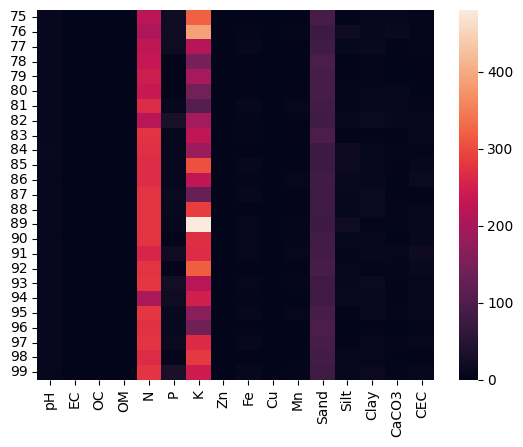

In [54]:
sns.heatmap(X_test)

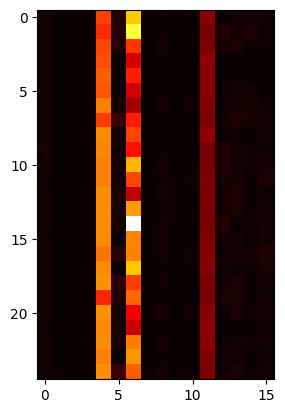

In [55]:
plt.imshow(X_test, cmap='hot', interpolation='nearest')

<AxesSubplot: >

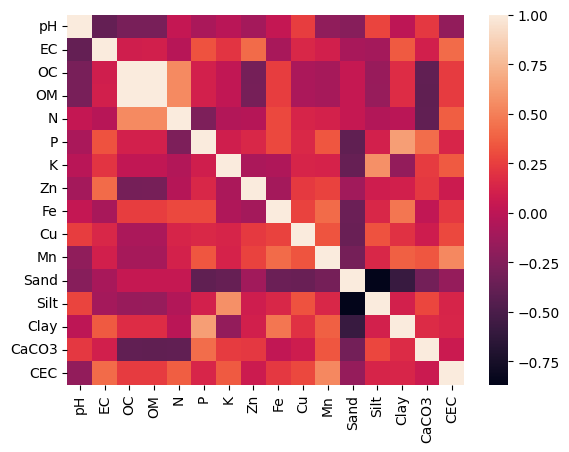

In [56]:
sns.heatmap(X_test.corr())

In [57]:
def convert_output(s):
    if s==0:
        return "Non-Fertile"
    else:
        return "Fertile"

res = X_test.reset_index(drop='true')
label = pd.DataFrame(testlabel.flatten())
res = pd.concat([res,label],axis=1)
res.columns = ['pH','EC','OC','OM','N','P','K','Zn','Fe','Cu','Mn','Sand','Silt','Clay','CaCO3','CEC','Output']
res.Output = res.Output.map(convert_output)

In [58]:
for index, row in res.iterrows():
    if row['Output']=="Non-Fertile":
        print(row['pH'])

8.2
8.64
8.48
8.61
7.5
8.12


In [60]:
res

,pH,EC,OC,OM,N,P,K,Zn,Fe,Cu,Mn,Sand,Silt,Clay,CaCO3,CEC,Output
0,8.40,0.35,0.24,0.41,220,18.3,320,0.74,2.1,0.37,3.7,90.2,3.4,6.4,6.28,3.78,Fertile
1,8.50,0.16,0.24,0.41,205,20.5,387,0.67,4.6,0.28,5.2,77.2,17.0,5.8,12.80,4.87,Fertile
2,8.47,0.19,0.27,0.46,225,17.3,212,0.53,8.3,0.04,3.1,82.1,7.9,10.0,3.70,5.09,Fertile
3,8.20,0.10,0.28,0.48,231,2.7,145,0.34,3.2,0.30,1.6,94.5,1.2,4.3,0.00,2.10,Non-Fertile
4,8.64,0.15,0.30,0.51,242,1.8,197,0.25,3.1,0.12,0.2,91.2,3.7,5.1,1.25,2.28,Non-Fertile
5,8.48,0.08,0.30,0.51,235,2.8,142,0.39,2.6,0.27,2.1,89.8,4.5,5.7,8.32,1.78,Non-Fertile
6,8.20,0.12,0.31,0.53,265,8.7,107,1.13,8.2,0.23,6.0,86.2,4.5,9.3,8.47,4.46,Fertile
7,8.42,0.74,0.34,0.58,218,33.7,198,1.16,4.2,0.53,3.3,80.7,5.7,13.6,8.21,6.02,Fertile
8,8.61,0.18,0.36,0.62,274,9.2,225,0.58,4.3,0.28,2.1,96.1,1.9,2.0,3.02,7.09,Non-Fertile
9,9.48,0.13,0.38,0.65,270,7.5,186,0.80,2.4,0.61,0.4,77.4,15.5,7.1,4.64,4.85,Fertile


In [61]:
def Fertilize(row):
    val = 0
    
    if row['OC']<0.5:
        val = 'OC: '+ str(round(0.5 - row['OC'], 2))
        row['OC'] = 0.5
    elif row['OC']>0.75:
        val = 'OC: '+ str(round(0.75 - row['OC'], 2))
        row['OC'] = 0.75
    
    elif row['N']<280:
        val = 'N: '+ str(round(280 - row['N'], 2))
        row['N'] = 280
    elif row['N']>560:
        val = 'N: '+ str(round(560 - row['N'], 2))
        row['N'] = 560
        
    elif row['P']<12.5:
        val = 'P: '+ str(round(12.5 - row['P'], 2))
        row['P'] = 12.5
    elif row['P']>25:
        val = 'P: '+ str(round(25 - row['P'], 2))
        row['P'] = 25
        
    elif row['K']<135:
        val = 'K: '+ str(round(135 - row['K'], 2))
        row['K'] = 135
    elif row['K']>335:
        val = 'K: '+ str(round(335 - row['K'], 2))
        row['K'] = 335
        
    
        
    elif row['Zn']<0.6:
        val = 'Zn: '+ str(round(0.6 - row['Zn'], 2))
        row['Zn'] = 0.6
    elif row['Fe'] < 4.5:
        val = 'Fe: '+ str(round(4.5 - row['Fe'], 2))
        row['Fe'] = 4.5
    elif row['Cu'] < 0.2:
        val = 'Cu: '+ str(round(0.2 - row['Cu'], 2))
        row['Cu'] = 0.2
    elif row['Mn']<1:
        val = 'Mn: '+ str(round(1 - row['Mn'], 2))
        row['Mn'] = 1
        
#     elif row['pH']<6.5:
#         val = 'pH: '+ str(round(6.5 - row['pH'], 2))
#         row['pH'] = 6.5
#     elif row['pH']>8:
#         val = 'pH: '+ str(round(8 - row['pH'], 2))
#         row['pH'] = 8
        
#     elif row['EC']>2.5:
#         val = 'EC: '+ str(round(2.5 - row['EC'], 2))
#         row['EC'] = 2.5
#     elif row['EC']>1.6:
#         val = 'EC: '+ str(round(1.6 - row['EC'], 2))
#         row['EC'] = 1.6
#     elif row['EC']>0.8:
#         val = 'EC: '+ str(round(0.8 - row['EC'], 2))
#         row['EC'] = 0.8

#     sand
#     silt
#     clay
    
#     elif row['CaCO3']<5:
#         val = 'CaCO3: '+ str(round(5 - row['CaCO3'], 2))
#         row['CaCO3'] = 5
        
    return val,row

In [62]:
final_l = []

for index, row in res.iterrows():
    if row['Output']=="Non-Fertile":
        val = 0
        new_p = 0
        l = []
        for inner_loop in range(15):
            val, row = Fertilize(row)
            if val!=0:
                l.append(val)

            n_test = row
            new = pd.DataFrame(n_test[0:16].values.reshape(1,-1))
            new.columns = ['pH','EC','OC','OM','N','P','K','Zn','Fe','Cu','Mn','Sand','Silt','Clay','CaCO3','CEC']
            new_p = rf.predict(new)
        final_l.append(l)
for i in range(len(final_l)):
    print(i,final_l[i])

0 ['OC: 0.22', 'N: 49', 'P: 9.8', 'Zn: 0.26', 'Fe: 1.3']
1 ['OC: 0.2', 'N: 38', 'P: 10.7', 'Zn: 0.35', 'Fe: 1.4', 'Cu: 0.08', 'Mn: 0.8']
2 ['OC: 0.2', 'N: 45', 'P: 9.7', 'Zn: 0.21', 'Fe: 1.9']
3 ['OC: 0.14', 'N: 6', 'P: 3.3', 'Zn: 0.02', 'Fe: 0.2']
4 ['N: 8', 'P: 3.0', 'Fe: 1.9', 'Cu: 0.08']
5 ['N: 15', 'P: 7.9', 'Zn: 0.22', 'Fe: 0.8', 'Cu: 0.02', 'Mn: 0.2']


In [63]:
rf

RandomForestClassifier(n_estimators=20)